In [1]:
# importing packages
using Plots

# process parameters
T₀ᵦ = 60.                       # °F
T₀ₜ = 170.                       # °F
Wᵦ = 9820.                     # lb/h
Wₜ = 6330.                      # lb/h 6330.0
Dᵦ = 1.25                       # in
Dₜ = 1.95                       # in
Dₑ = Dₜ - Dᵦ                     # in
Aₛᵦ = (pi*Dᵦ^2)/4                # in^2
Aₛₜ = (pi/4)*((Dₜ)^2 - (Dᵦ)^2)     # in^2   

hᵣₖ₄ = 5.                        # in RK4 step

5.0

In [2]:
# specific heat capacity - Perry

# molar mass
Mᵦ = 78.11184
Mₜ = 92.13842

# Benzene coefficients
C₁ᵦ = 162940.
C₂ᵦ = -344.94
C₃ᵦ = 0.85562

# Toluene coefficients
C₁ₜ = 140140
C₂ₜ = -152.3
C₃ₜ = 0.695

# conversion constant of J/kg.K to BTU/lb.F
ccp = 0.000238846

cₚᵦ(T) = (C₁ᵦ + C₂ᵦ*T + C₃ᵦ*T^2)*(1/Mᵦ)*ccp # J/Kg.K to BTU/lb.°F
cₚₜ(T) = (C₁ₜ + C₂ₜ*T + C₃ₜ*T^2)*(1/Mₜ)*ccp # J/Kg.K to BTU/lb.°F

cₚₜ (generic function with 1 method)

In [3]:
# density
ρ₁ᵦ = 1.0259
ρ₂ᵦ = 0.26666
ρ₃ᵦ = 562.05
ρ₄ᵦ = 0.28394

ρ₁ₜ = 0.8792
ρ₂ₜ = 0.27136
ρ₃ₜ = 591.75
ρ₄ₜ = 0.29241

factor = 0.06242796 #convert kg/m^3 to lb/in^3

ρᵦ(T) = (ρ₁ᵦ/(ρ₂ᵦ^(1 + ((1 - T/ρ₃ᵦ)^ρ₄ᵦ))))*Mᵦ*factor*(1/1728)  #kg/m^3 to lb/in^3 
ρₜ(T) = (ρ₁ₜ/(ρ₂ₜ^(1 + ((1 - T/ρ₃ₜ)^ρ₄ₜ))))*Mₜ*factor*(1/1728) #kg/m^3 to lb/in^3

ρₜ (generic function with 1 method)

In [4]:
# thermal conductivity - Latini et al.

Aᶜ = 0.0346
α = 1.2
β = 1.
γ = 0.167

Tᵦᵦ = 353.2
Tcᵦ = 562.2

Tᵦₜ = 383.8
Tcₜ = 591.0

clamb = 6.93347179852

λLᵦ(T) = ((((Aᶜ*Tᵦᵦ^α)/((Mᵦ^β)*(Tcᵦ^γ)))*((1-(T/Tcᵦ))^0.38))/((T/Tcᵦ)^(1/6)))*clamb*(1/144) #W/mK to BTU in /(hr in^2 F)
λLₜ(T) = ((((Aᶜ*Tᵦₜ^α)/((Mₜ^β)*(Tcₜ^γ)))*((1-(T/Tcₜ))^0.38))/((T/Tcₜ)^(1/6)))*clamb*(1/144)     #W/mK to BTU in /(hr in^2 F)

λLₜ (generic function with 1 method)

In [5]:
# dynamic viscosity - Hsu method - Perry
# six aromatic
Σaᵢᵦ = -0.857*6
Σbᵢᵦ = (-0.0098*6)/100
Σcᵢᵦ = (2.4376*6)/0.0001
Σdᵢᵦ = 0.1311*6
Pcᵦ = 48.9  #bar

# five aromatic + benzil carbon + CH3
Σaᵢₜ = -0.857*5 + 0.7896 + 0.0570 # benzil carbon + CH3
Σbᵢₜ = (-0.0098*5 - 0.0231 - 0.2382)/100
Σcᵢₜ = (2.4376*5 - 0.9222 + 0.7556)/0.0001
Σdᵢₜ = 0.1311*5 + 0.1928 - 0.1765
Pcₜ = 41.  #bar

cvisc = 2.4190883105

ηᵦ(T) = exp(Σaᵢᵦ + T*Σbᵢᵦ + Σcᵢᵦ/T^2 + Σdᵢᵦ*log(Pcᵦ))*cvisc*(1/12)  #cP to lb/in.h
ηₜ(T) = exp(Σaᵢₜ + T*Σbᵢₜ + Σcᵢₜ/T^2 + Σdᵢₜ*log(Pcₜ))*cvisc*(1/12)      #cP to lb/in.h

ηₜ (generic function with 1 method)

In [6]:
function hᵦ(T)
    ReDᵦ = (Dᵦ*Wᵦ)/(ηᵦ(T)*Aₛᵦ)
    Prᵦ = (ηᵦ(T)*cₚᵦ(T))/λLᵦ(T)
    Nusselt_Dᵦ = 0.023*(ReDᵦ^0.8)*(Prᵦ^0.4) # 0.4 for heating

    return (λLᵦ(T)*(Nusselt_Dᵦ))/Dᵦ
end

hᵦ (generic function with 1 method)

In [7]:
function hₜ(T)
    ReDₑ = (Dₑ*Wₜ)/(ηₜ(T)*Aₛₜ) # Reid annulus matches the general
    Prₜ = (ηₜ(T)*cₚₜ(T))/λLₜ(T)
    Nusselt_Dₑ = 0.023*(ReDₑ^0.8)*(Prₜ^0.3) # 0.3 for cooling

    return (λLₜ(T)*(Nusselt_Dₑ))/Dₑ
end

hₜ (generic function with 1 method)

In [8]:
function U(Tᵦ, Tₜ)  # °F
    return (hᵦ(((Tᵦ-32)/1.8)+273.15) * hₜ(((Tₜ-32)/1.8)+273.15)) / (hᵦ(((Tᵦ-32)/1.8)+273.15) + hₜ(((Tₜ-32)/1.8)+273.15))
end

U (generic function with 1 method)

In [9]:
# creating iterative vectors
Tᵦ = Vector{Float64}()
Tₜ = Vector{Float64}()
Lₚ = Vector{Float64}()
push!(Tᵦ, T₀ᵦ)
push!(Tₜ, T₀ₜ)
push!(Lₚ, 0.)
i = 1

1

In [10]:
while Tᵦ[i] <= 100.

    k₁ = hᵣₖ₄*((Mᵦ/((C₁ᵦ + 2*C₂ᵦ*(((Tᵦ[i]-32)/1.8)+273.15) + 3*C₃ᵦ*((((Tᵦ[i]-32)/1.8)+273.15)^2))*Wᵦ*ccp))*(pi*Dᵦ)*U(Tᵦ[i], Tₜ[i])*(Tₜ[i]-Tᵦ[i]))
    l₁ = hᵣₖ₄*((Mₜ/((C₁ₜ + 2*C₂ₜ*(((Tₜ[i]-32)/1.8)+273.15) + 3*C₃ₜ*((((Tₜ[i]-32)/1.8)+273.15)^2))*Wₜ*ccp))*(pi*Dᵦ)*U(Tᵦ[i], Tₜ[i])*(Tᵦ[i]-Tₜ[i]))
    
    k₂ = hᵣₖ₄*((Mᵦ/((C₁ᵦ + 2*C₂ᵦ*((((Tᵦ[i]+k₁/2)-32)/1.8)+273.15) + 3*C₃ᵦ*(((((Tᵦ[i]+k₁/2)-32)/1.8)+273.15)^2))*Wᵦ*ccp))*(pi*Dᵦ)*U((Tᵦ[i]+k₁/2), (Tₜ[i]+l₁/2))*((Tₜ[i]+l₁/2)-(Tᵦ[i]+k₁/2)))
    l₂ = hᵣₖ₄*((Mₜ/((C₁ₜ + 2*C₂ₜ*((((Tₜ[i]+l₁/2)-32)/1.8)+273.15) + 3*C₃ₜ*(((((Tₜ[i]+l₁/2)-32)/1.8)+273.15)^2))*Wₜ*ccp))*(pi*Dᵦ)*U((Tᵦ[i]+k₁/2), (Tₜ[i]+l₁/2))*((Tᵦ[i]+k₁/2)-(Tₜ[i]+l₁/2)))

    k₃ = hᵣₖ₄*((Mᵦ/((C₁ᵦ + 2*C₂ᵦ*((((Tᵦ[i]+k₂/2)-32)/1.8)+273.15) + 3*C₃ᵦ*(((((Tᵦ[i]+k₂/2)-32)/1.8)+273.15)^2))*Wᵦ*ccp))*(pi*Dᵦ)*U((Tᵦ[i]+k₂/2), (Tₜ[i]+l₂/2))*((Tₜ[i]+l₂/2)-(Tᵦ[i]+k₂/2)))
    l₃ = hᵣₖ₄*((Mₜ/((C₁ₜ + 2*C₂ₜ*((((Tₜ[i]+l₂/2)-32)/1.8)+273.15) + 3*C₃ₜ*(((((Tₜ[i]+l₂/2)-32)/1.8)+273.15)^2))*Wₜ*ccp))*(pi*Dᵦ)*U((Tᵦ[i]+k₂/2), (Tₜ[i]+l₂/2))*((Tᵦ[i]+k₂/2)-(Tₜ[i]+l₂/2)))

    k₄ = hᵣₖ₄*((Mᵦ/((C₁ᵦ + 2*C₂ᵦ*((((Tᵦ[i]+k₃)-32)/1.8)+273.15) + 3*C₃ᵦ*(((((Tᵦ[i]+k₃)-32)/1.8)+273.15)^2))*Wᵦ*ccp))*(pi*Dᵦ)*U((Tᵦ[i]+k₃), (Tₜ[i]+l₃))*((Tₜ[i]+l₃)-(Tᵦ[i]+k₃)))
    l₄ = hᵣₖ₄*((Mₜ/((C₁ₜ + 2*C₂ₜ*((((Tₜ[i]+l₃)-32)/1.8)+273.15) + 3*C₃ₜ*(((((Tₜ[i]+l₃)-32)/1.8)+273.15)^2))*Wₜ*ccp))*(pi*Dᵦ)*U((Tᵦ[i]+k₃), (Tₜ[i]+l₃))*((Tᵦ[i]+k₃)-(Tₜ[i]+l₃)))

    Tₙᵦ = Tᵦ[i] + (1/6)*(k₁ + 2*k₂ + 2*k₃ + k₄)
    Tₙₜ = Tₜ[i] + (1/6)*(l₁ + 2*l₂ + 2*l₃ + l₄)
    push!(Tᵦ, Tₙᵦ)
    push!(Tₜ, Tₙₜ)
    global i += 1
end

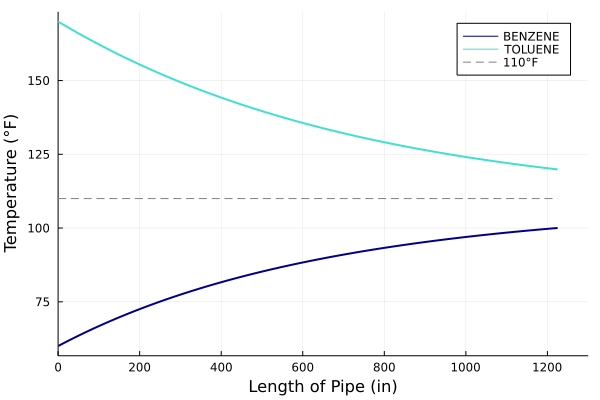

In [11]:
x_axis = Vector{Float64}()
value = 0
for i in 1:length(Tᵦ)
    push!(x_axis, value)
    global value += 5.
end

A = "BENZENE"
B = "TOLUENE"
F = "110°F"
y = "Temperature (°F)"
x = "Length of Pipe (in)"

f(x) = 110.

plot(x_axis, Tᵦ, lw=2, label=A, xl=x, yl=y, xlim=(0, 1300), c=:darkblue)
plot!(x_axis, Tₜ, lw=2, label=B, c=:turquoise)
plot!(x_axis, f, lw=1, label=F, line=(:dash, 1), c=:grey)